## UPST Stock Analysis
<img src="static/logo.png" alt="error" width="500" height="100">

### Abstract
information
information

### Process
sub heading

### Setup
see README file for environment setup

In [1]:
from src.scraper2 import scrape
from src.functions import reviewCount
import pandas as pd
import datetime

url = "https://www.creditkarma.com/reviews/personal-loan/single/id/upstart-personal-loans?pg={}"
startPage = 1
endPage = 1
csvName = "test.csv"
# Format scrape(url:str,startPage:int,endPage:int,csvName:str)
#scrape(url,startPage,endPage,csvName)
"""
reviews = reviewCount(url)
pageCount = int(reviews/10)
if(reviews%10 != 0):
    pageCount += 1
print("There are ",reviews," reviews and ",pageCount, "pages")
"""
#startPage = int(input("What page would you like to start reading at: "))
#endPage = int(input("To what page would you like to read to: "))

'\nreviews = reviewCount(url)\npageCount = int(reviews/10)\nif(reviews%10 != 0):\n    pageCount += 1\nprint("There are ",reviews," reviews and ",pageCount, "pages")\n'

In [2]:
#df = scrape(url,startPage,endPage,csvName)
#df.head()

df = pd.read_csv('data/first1400.csv')

print(df.shape)
df.head()


(14000, 2)


,rating out of 5,date
0,5,"Apr 05, 2023"
1,5,"Apr 04, 2023"
2,5,"Apr 03, 2023"
3,5,"Apr 02, 2023"
4,3,"Mar 31, 2023"


In [3]:
df['newDate'] = df['date'].apply(lambda x: (datetime.datetime.strptime(x, '%b %d, %Y').strftime('%Y-%m-%d')))
#df['date'] = df['newDate']
#df.drop(['date'],axis=1)
df['quarter'] = df['newDate'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d').month - 1) // 3 + 1)

hot_values = pd.get_dummies(df['quarter'])
temp_df = df
temp_df = temp_df.join(hot_values)
print(temp_df.shape)
temp_df.head()

(14000, 8)


,rating out of 5,date,newDate,quarter,1,2,3,4
0,5,"Apr 05, 2023",2023-04-05,2,0,1,0,0
1,5,"Apr 04, 2023",2023-04-04,2,0,1,0,0
2,5,"Apr 03, 2023",2023-04-03,2,0,1,0,0
3,5,"Apr 02, 2023",2023-04-02,2,0,1,0,0
4,3,"Mar 31, 2023",2023-03-31,1,1,0,0,0


In [4]:
df = temp_df.drop(['date','quarter'],axis=1)
df = df.rename(columns={'newDate': 'date'})


interest_rates = pd.read_csv('data/interestRates.csv')  # read in your dataframe from a CSV file, replace with your actual data source


# convert date columns to datetime format
df['date'] = pd.to_datetime(df['date'])
interest_rates['DATE'] = pd.to_datetime(interest_rates['DATE'])

# extract year and month from date columns
df['year_month'] = df['date'].dt.to_period('M')
interest_rates['year_month'] = interest_rates['DATE'].dt.to_period('M')

# merge DataFrames on year_month column
merged = df.merge(interest_rates, on='year_month', suffixes=('', '_interest'))

# create new column based on interest value
#merged['interest'] = merged['value_interest']

# drop unnecessary columns
merged = merged.drop(['DATE'], axis=1)
df = merged
df.head()

,rating out of 5,date,1,2,3,4,year_month,FEDFUNDS
0,3,2023-03-31,1,0,0,0,2023-03,4.65
1,5,2023-03-31,1,0,0,0,2023-03,4.65
2,5,2023-03-31,1,0,0,0,2023-03,4.65
3,5,2023-03-30,1,0,0,0,2023-03,4.65
4,5,2023-03-28,1,0,0,0,2023-03,4.65


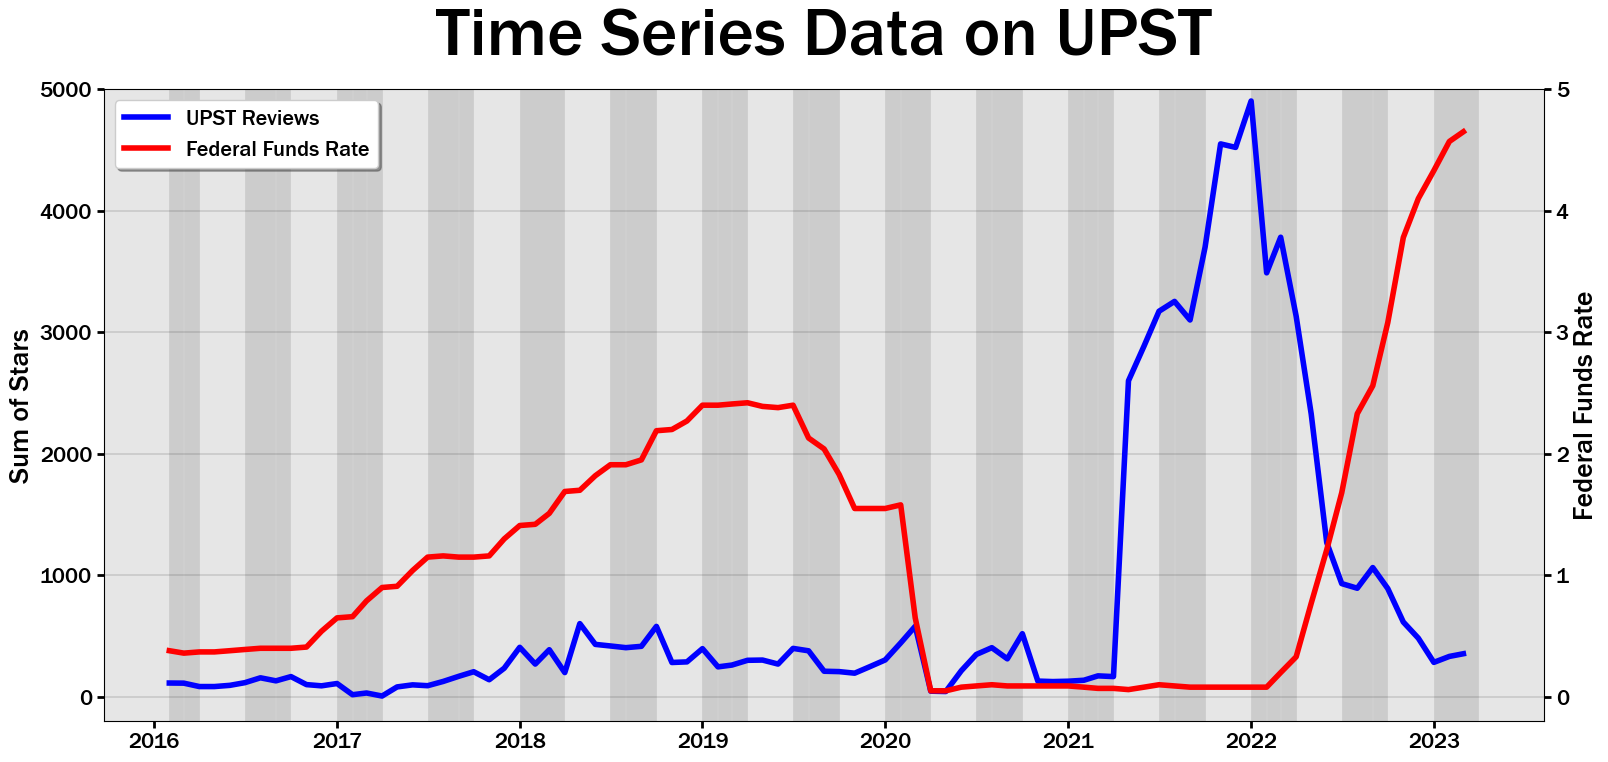

In [5]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd

#bold_roboto_font = FontProperties(fname='static/Roboto-BoldCondensed.ttf')
#roboto_font = FontProperties(fname='static/Roboto-Condensed.ttf')
# set default font for all text in the plot
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Franklin Gothic Medium'


light = (0.8, 0.8, 0.8, 1.0)
dark = (0.9, 0.9, 0.9, 1.0)



title_size = 50
label_size = 20
legend_size = 16
tick_size = 16
line_weight = 4
border_width = .5
border_color = 'black'
tick_width = 2
tick_length = 5
fig_width = 24
fig_height = 8
grid_weight = .15

# Calculate sum of reviews per month
dates = df['date'].astype(str).apply(lambda x: x[:-3]) # get year-month format
reviews_per_month = df.groupby(dates)['rating out of 5'].sum()
first_quarter = df.groupby(dates)[1].sum()
third_quarter = df.groupby(dates)[3].sum()

fig, ax1 = plt.subplots(figsize=(fig_width, fig_height))

# Convert the index to datetime objects
date_index = pd.to_datetime(reviews_per_month.index, format='%Y-%m')

# Ploting left axis
ax1.plot(date_index, reviews_per_month.values, color='blue', label='UPST Reviews', linewidth=line_weight)

# Adding second y axis for FEDFUNDS rate
ax2 = ax1.twinx()
ax2.plot(date_index, df.groupby(dates)['FEDFUNDS'].mean().sort_index(), color='red', label='Federal Funds Rate', linewidth=line_weight)

# Set padding
plt.subplots_adjust(left=0.2, right=0.8)

# Set title
plt.title("Time Series Data on UPST", fontweight='bold', fontsize=title_size, y=1.04)
fig.subplots_adjust(top=0.9)

# Set the x-axis & y-axis label
#ax1.set_xlabel('Date', fontsize=label_size)
ax1.set_ylabel('Sum of Stars', fontsize=label_size)
ax2.set_ylabel('Federal Funds Rate', fontsize=label_size)

# Add legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
ax1.legend(handles, labels, loc='upper left',fontsize=legend_size, frameon=True, shadow=True)

# Adding ticks
ax1.tick_params(axis='x', labelsize=tick_size, width=tick_width, length=tick_length)
ax1.tick_params(axis='y', labelsize=tick_size, width=tick_width, length=tick_length)
ax2.tick_params(axis='y', labelsize=tick_size, width=tick_width, length=tick_length)

# Adding grid lines
ax1.grid(axis='y', color=border_color, linewidth=grid_weight)
ax1.set_ylim([-200, 5000])
ax2.set_ylim([-0.2, 5])


# Adding 1st and 3rd quater backgrounds
ax1.set_facecolor(color=dark)
for idx in first_quarter[first_quarter != 0].index:
    ax1.axvspan(pd.to_datetime(idx, format='%Y-%m'),(pd.to_datetime(idx, format='%Y-%m')+pd.offsets.MonthEnd(1)), color=light, alpha=1, linewidth=0.5)

for idx in third_quarter[third_quarter != 0].index:
    ax1.axvspan(pd.to_datetime(idx, format='%Y-%m'),(pd.to_datetime(idx, format='%Y-%m')+pd.offsets.MonthEnd(1)), color=light, alpha=1, linewidth=0.5)

for spine in ax1.spines.values():
    spine.set_color(border_color)
    spine.set_linewidth(border_width)

plt.show()

Importing Raw Federal Reserve Bank Data - https://www.federalreserve.gov/data.htm  
<img src="static/FRB.jpg" alt="error" width="600" height="315">


In [6]:
frb = pd.read_csv('data/FRB_G19_Raw.csv')
frb = frb.drop(index=[0,1])

frb['Series Description'] = pd.to_datetime(frb['Series Description'])
frb['year_month'] = frb['Series Description'].dt.to_period('M')

frb = frb.rename(columns={'Percent change of total consumer credit, seasonally adjusted at an annual rate': 'total_change'})
frb = frb.rename(columns={'Percent change of total nonrevolving consumer credit, seasonally adjusted at an annual rate': 'nonrevolving_change'})

new_data = pd.DataFrame(index=frb.index)
new_data['year_month'] = frb['year_month']
data_float = frb[['total_change', 'nonrevolving_change']].astype(float)
new_data = new_data.join(data_float)

# merge DataFrames on year_month column
merged = df.merge(new_data, on='year_month', suffixes=('', '_frb'))
df = merged
print(df)

       rating out of 5       date  1  2  3  4 year_month  FEDFUNDS  \
0                    5 2023-02-28  1  0  0  0    2023-02      4.57   
1                    5 2023-02-27  1  0  0  0    2023-02      4.57   
2                    5 2023-02-27  1  0  0  0    2023-02      4.57   
3                    5 2023-02-26  1  0  0  0    2023-02      4.57   
4                    5 2023-02-26  1  0  0  0    2023-02      4.57   
...                ...        ... .. .. .. ..        ...       ...   
13917                5 2016-02-19  1  0  0  0    2016-02      0.38   
13918                5 2016-02-18  1  0  0  0    2016-02      0.38   
13919                5 2016-02-15  1  0  0  0    2016-02      0.38   
13920                5 2016-02-15  1  0  0  0    2016-02      0.38   
13921                5 2016-02-12  1  0  0  0    2016-02      0.38   

       total_change  nonrevolving_change  
0              3.82                 3.43  
1              3.82                 3.43  
2              3.82           

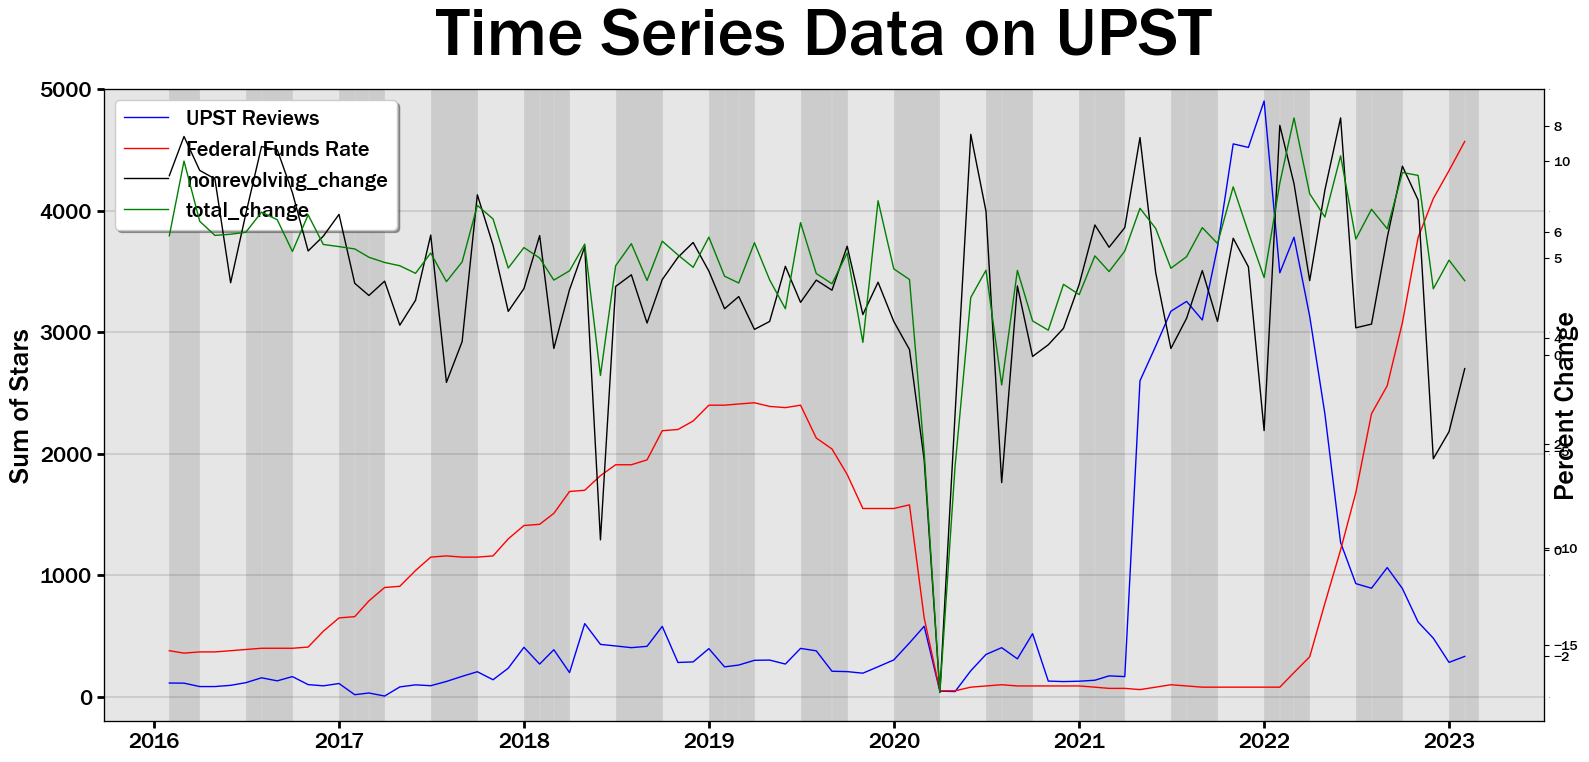

In [11]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd

#bold_roboto_font = FontProperties(fname='static/Roboto-BoldCondensed.ttf')
#roboto_font = FontProperties(fname='static/Roboto-Condensed.ttf')
# set default font for all text in the plot
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Franklin Gothic Medium'


light = (0.8, 0.8, 0.8, 1.0)
dark = (0.9, 0.9, 0.9, 1.0)



title_size = 50
label_size = 20
legend_size = 16
tick_size = 16
line_weight = 1
border_width = .5
border_color = 'black'
tick_width = 2
tick_length = 5
fig_width = 24
fig_height = 8
grid_weight = .15

# Calculate sum of reviews per month
dates = df['date'].astype(str).apply(lambda x: x[:-3]) # get year-month format
reviews_per_month = df.groupby(dates)['rating out of 5'].sum()
first_quarter = df.groupby(dates)[1].sum()
third_quarter = df.groupby(dates)[3].sum()

fig, ax1 = plt.subplots(figsize=(fig_width, fig_height))

# Convert the index to datetime objects
date_index = pd.to_datetime(reviews_per_month.index, format='%Y-%m')

# Ploting left axis
ax1.plot(date_index, reviews_per_month.values, color='blue', label='UPST Reviews', linewidth=line_weight)

# Adding second y axis for FEDFUNDS rate
ax2 = ax1.twinx()
ax2.plot(date_index, df.groupby(dates)['FEDFUNDS'].mean().sort_index(), color='red', label='Federal Funds Rate', linewidth=line_weight)
ax3 = ax1.twinx()
ax3.plot(date_index, df.groupby(dates)['nonrevolving_change'].mean().sort_index(), color='black', label='nonrevolving_change', linewidth=line_weight)
ax4 = ax1.twinx()
ax4.plot(date_index, df.groupby(dates)['total_change'].mean().sort_index(), color='green', label='total_change', linewidth=line_weight)
# Set padding
plt.subplots_adjust(left=0.2, right=0.8)

# Set title
plt.title("Time Series Data on UPST", fontweight='bold', fontsize=title_size, y=1.04)
fig.subplots_adjust(top=0.9)

# Set the x-axis & y-axis label
#ax1.set_xlabel('Date', fontsize=label_size)
ax1.set_ylabel('Sum of Stars', fontsize=label_size)
ax2.set_ylabel('Percent Change', fontsize=label_size)

# Add legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()
handles4, labels4 = ax4.get_legend_handles_labels()

handles = handles1 + handles2 + handles3 + handles4
labels = labels1 + labels2 + labels3 + labels4
ax1.legend(handles, labels, loc='upper left',fontsize=legend_size, frameon=True, shadow=True)

# Adding ticks
ax1.tick_params(axis='x', labelsize=tick_size, width=tick_width, length=tick_length)
ax1.tick_params(axis='y', labelsize=tick_size, width=tick_width, length=tick_length)
ax2.tick_params(axis='y', labelsize=0, width=0, length=0)

# Adding grid lines
ax1.grid(axis='y', color=border_color, linewidth=grid_weight)
ax1.set_ylim([-200, 5000])
ax2.set_ylim([-0.2, 5])


# Adding 1st and 3rd quater backgrounds
ax1.set_facecolor(color=dark)
for idx in first_quarter[first_quarter != 0].index:
    ax1.axvspan(pd.to_datetime(idx, format='%Y-%m'),(pd.to_datetime(idx, format='%Y-%m')+pd.offsets.MonthEnd(1)), color=light, alpha=1, linewidth=0.5)

for idx in third_quarter[third_quarter != 0].index:
    ax1.axvspan(pd.to_datetime(idx, format='%Y-%m'),(pd.to_datetime(idx, format='%Y-%m')+pd.offsets.MonthEnd(1)), color=light, alpha=1, linewidth=0.5)

for spine in ax1.spines.values():
    spine.set_color(border_color)
    spine.set_linewidth(border_width)

plt.show()

In [8]:
stock = pd.read_csv('data/UPST.csv')
stock


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-11,88.660004,91.349998,86.680000,89.730003,89.730003,8731900
1,2022-04-12,93.769997,95.360001,83.510002,83.959999,83.959999,11783100
2,2022-04-13,83.870003,88.800003,82.080002,88.019997,88.019997,8371900
3,2022-04-14,87.610001,88.620003,82.339996,82.610001,82.610001,9169000
4,2022-04-18,82.290001,83.879997,79.010002,81.720001,81.720001,8451400
...,...,...,...,...,...,...,...
244,2023-03-31,14.380000,15.940000,14.200000,15.890000,15.890000,10360100
245,2023-04-03,15.700000,16.430000,15.560000,16.340000,16.340000,5469200
246,2023-04-04,16.250000,16.455999,15.570000,16.070000,16.070000,3504300
247,2023-04-05,15.660000,16.920000,15.600000,16.799999,16.799999,6232900
